**Assignment 16**- Neural Networks

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/content/forestfires.csv")

In [5]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
data.shape                        ##no.of rows n columns

(517, 31)

In [7]:
data.info()                       ## check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [11]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
d1= data.drop_duplicates()

In [10]:
d1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [16]:
d2=d1.drop(d1.columns[11:30],axis=1)                ##dropping the columns that are one-hot encoded 

In [17]:
d2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


Using Label Encoder to convert categorical variables to numerical values

In [18]:
d2["month"]=label.fit_transform(d2["month"])
d2["day"]=label.fit_transform(d2["day"])
d2["size_category"]=label.fit_transform(d2["size_category"])

In [19]:
d2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


Visualising the distribution of data using distplot

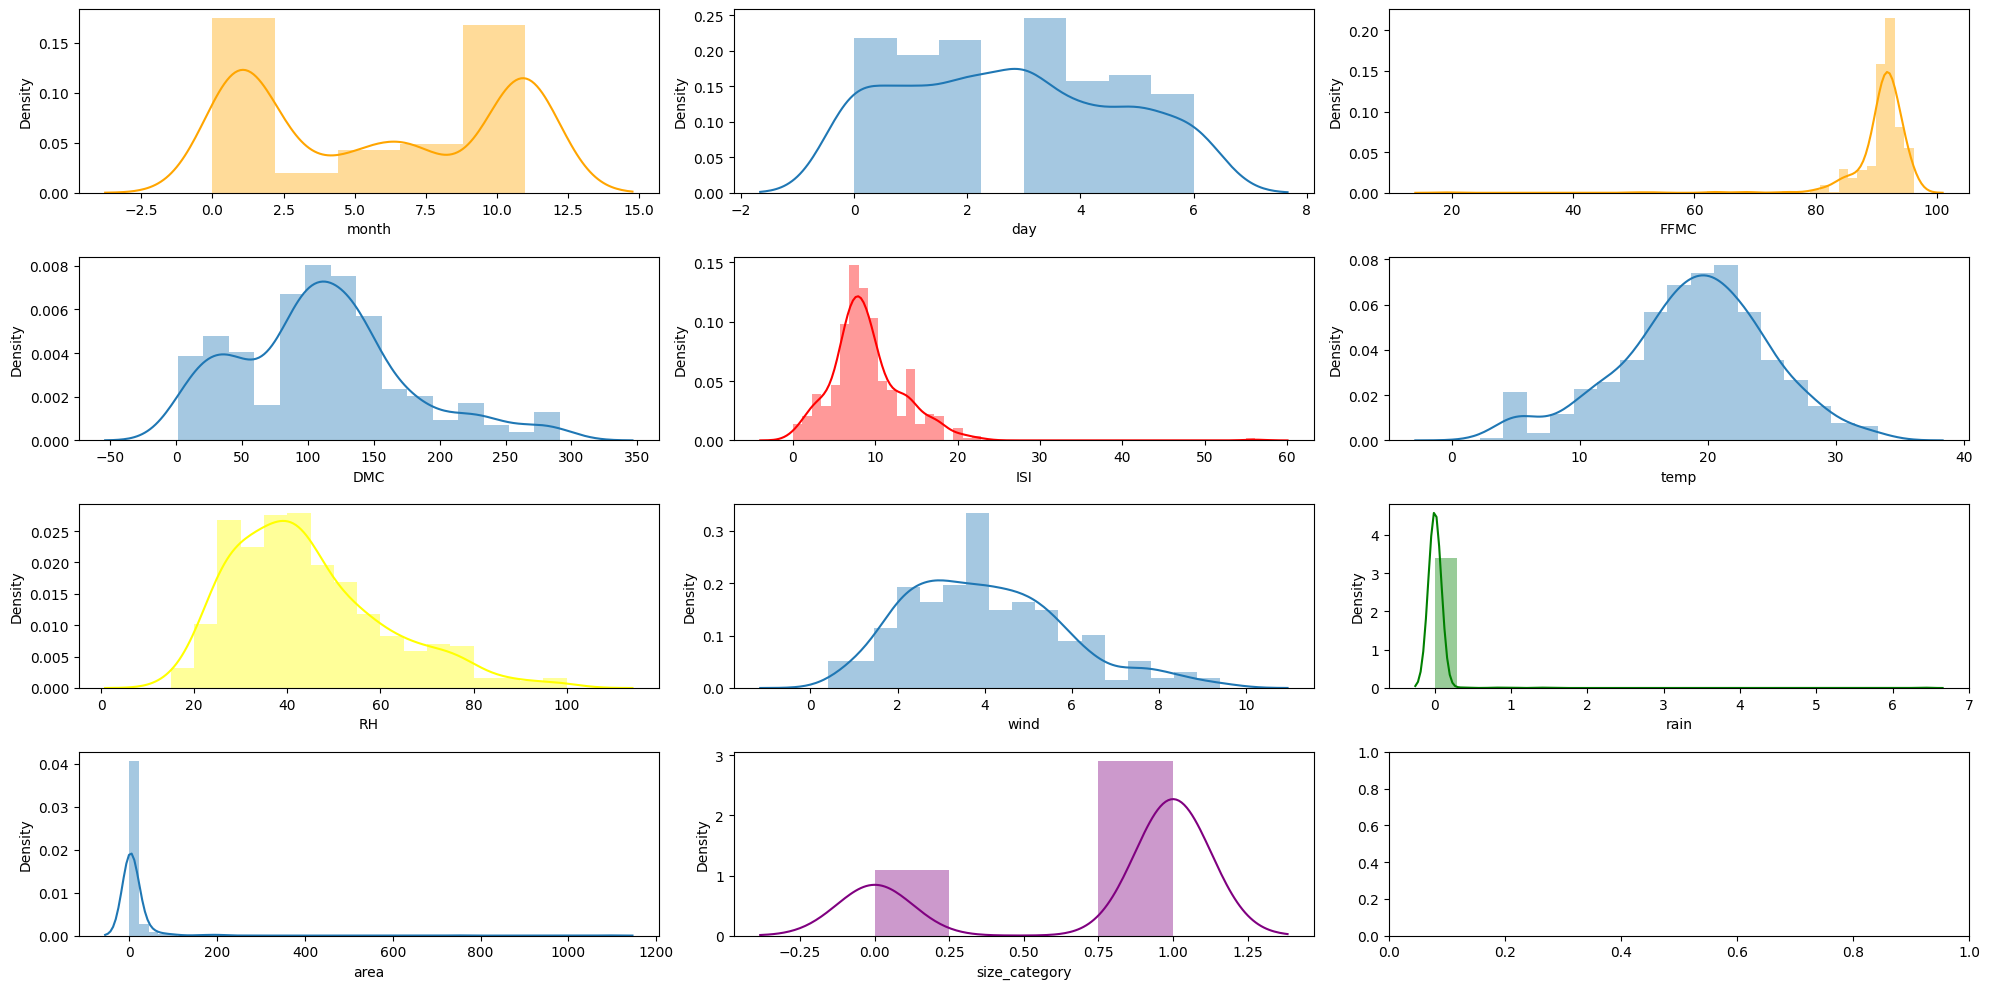

In [21]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.distplot(d2.month,ax=ax[0,0],color='orange')
sns.distplot(d2.day,ax=ax[0,1])
sns.distplot(d2.FFMC,ax=ax[0,2],color='orange')
sns.distplot(d2.DMC,ax=ax[1,0])
sns.distplot(d2.ISI,ax=ax[1,1],color='red')
sns.distplot(d2.temp,ax=ax[1,2])
sns.distplot(d2.RH,ax=ax[2,0],color='yellow')
sns.distplot(d2.wind,ax=ax[2,1])
sns.distplot(d2.rain,ax=ax[2,2],color='green')
sns.distplot(d2.area,ax=ax[3,0])
sns.distplot(d2.size_category,ax=ax[3,1],color='purple')

plt.tight_layout()

Using Boxplot to see the presence of outliers

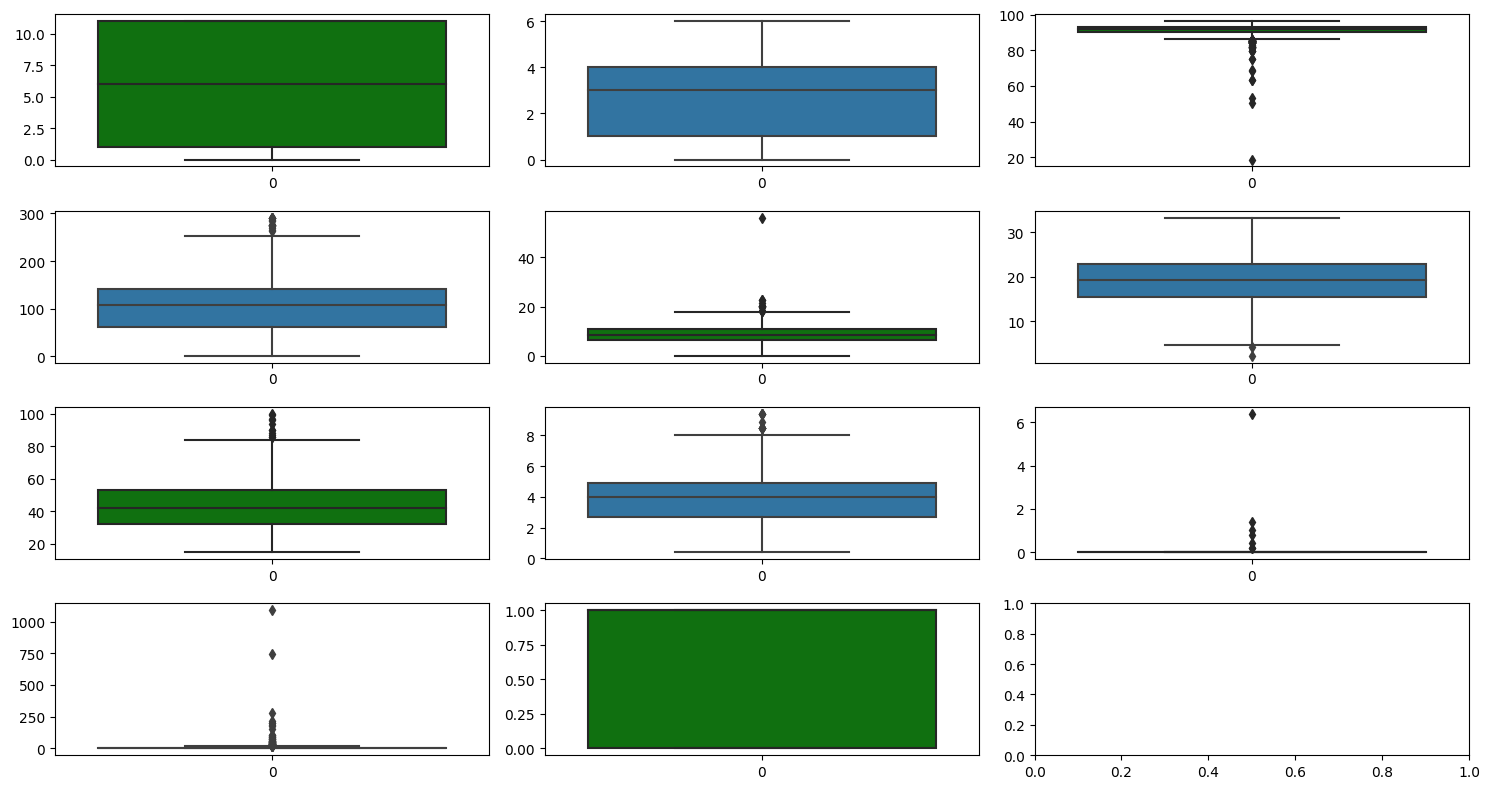

In [24]:
fig,ax=plt.subplots(4, 3, figsize=(15,8))

sns.boxplot(d2.month,ax=ax[0,0],color='g')
sns.boxplot(d2.day,ax=ax[0,1])
sns.boxplot(d2.FFMC,ax=ax[0,2],color='g')
sns.boxplot(d2.DMC,ax=ax[1,0])
sns.boxplot(d2.ISI,ax=ax[1,1],color='g')
sns.boxplot(d2.temp,ax=ax[1,2])
sns.boxplot(d2.RH,ax=ax[2,0],color='g')
sns.boxplot(d2.wind,ax=ax[2,1])
sns.boxplot(d2.rain,ax=ax[2,2],color='g')
sns.boxplot(d2.area,ax=ax[3,0])
sns.boxplot(d2.size_category,ax=ax[3,1],color='g')
plt.tight_layout()

Seperating independent and dependent values

In [25]:
x= d2.iloc[:,:11]
y= d2.iloc[:,-1]

Constructing a Sequential neural network with 11 input  neurons in the first layer, 8 neurons in the hidden layer and 1 neuron in the output layer

In [26]:
model = Sequential()
model.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

Compiling the model and using binary cross entropy as the loss function and adam as the weight optimizer

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fitting the model on data

In [28]:
model.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 3s 10ms/step - loss: 0.5796 - accuracy: 0.7449 - val_loss: 0.7176 - val_accuracy: 0.6726
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.7595 - val_loss: 0.6083 - val_accuracy: 0.6964
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7713 - val_loss: 0.5844 - val_accuracy: 0.7143
Epoch 4/150
35/35 [==============================] - 0s 5ms/step - loss: 0.4673 - accuracy: 0.7918 - val_loss: 0.5197 - val_accuracy: 0.7440
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.8152 - val_loss: 0.6823 - val_accuracy: 0.7202
Epoch 6/150
35/35 [==============================] - 0s 5ms/step - loss: 0.3874 - accuracy: 0.8328 - val_loss: 0.4160 - val_accuracy: 0.8036
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 0.3347 - accuracy: 0.8710 - val_loss: 0.5436 - val_accuracy: 0.7798
Epoch 8/150


Evaluation of the model

In [29]:
score = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9882
accuracy: 98.82%


In [30]:
history= model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1136 - val_accuracy: 0.9643
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1183 - val_accuracy: 0.9643
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.1143 - val_accuracy: 0.9702
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1381 - val_accuracy: 0.9524
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1202 - val_accuracy: 0.9583
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9971 - val_loss: 0.1209 - val_accuracy: 0.9583
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1200 - val_accuracy: 0.9643
Epoch 8/150
3

All the evaluation metric in the model history

In [31]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Visualizing the model history for train and test accuracies

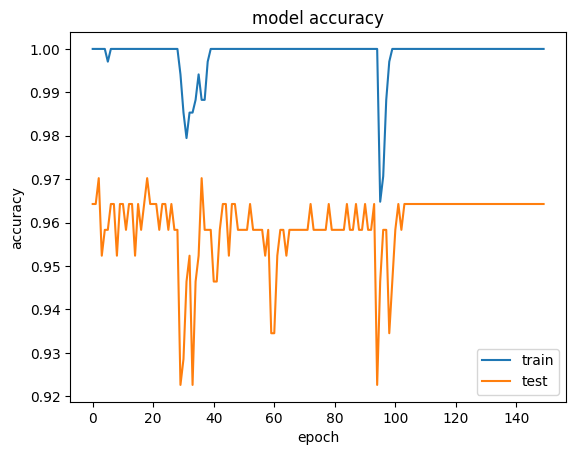

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Visualizing the model history for the train and test loss

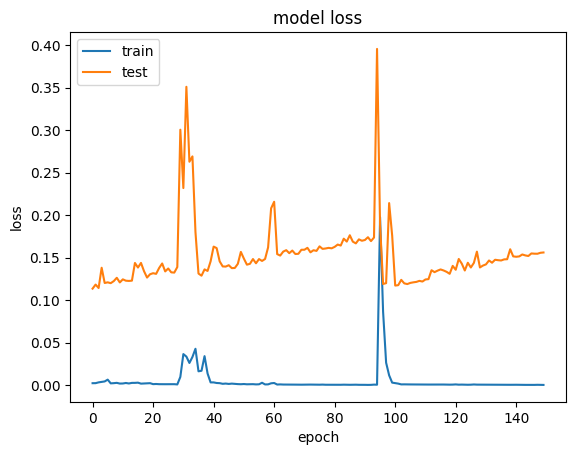

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conclusion:-** Neural network efficiently classifies the burnt forest areas with high evaluation accuracy of 98.82% and loss of 0.0386. 